In [4]:
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, accuracy_score
import nltk

nltk.download('punkt')
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS
import re
from deep_translator import GoogleTranslator

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
df = pd.read_csv('Data_Gojek.csv')

In [6]:
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0a86a4a4-0927-4510-a033-9fb4a87c9704,Fahrina P,https://play-lh.googleusercontent.com/a/ACg8oc...,Beberapa bulan setiap kali pesan gocar selalu ...,2,11,4.93.1,2024-09-17 08:13:13,"Hai, Kak Fahrina. Pastikan kamu sudah memberik...",2024-09-17 11:26:43,4.93.1,most_relevant,com.gojek.app
1,b69a58c4-9315-4a72-a524-e856290d0f5b,Trissan Kusumah,https://play-lh.googleusercontent.com/a-/ALV-U...,"kecewa sih, aplikasi nya mulai error padahal j...",1,33,4.93.1,2024-09-09 05:57:09,"Hai Kak Trissan, mohon maaf atas kendalanya. P...",2024-09-09 07:08:48,4.93.1,most_relevant,com.gojek.app
2,ec7b84ec-8cb5-4d87-91e3-6437c6f3ddc7,Steven Wijaya,https://play-lh.googleusercontent.com/a/ACg8oc...,"Makin hari makin update tidak jelas, saya tida...",1,8,4.93.1,2024-09-15 19:05:55,"Hai Kak Steven, mohon maaf atas kendalanya. Pa...",2024-09-16 08:31:29,4.93.1,most_relevant,com.gojek.app
3,bf967276-a081-49e8-9ed1-141822c58de2,Raihan Saputra,https://play-lh.googleusercontent.com/a-/ALV-U...,"Aplikasi menyusahkan user, pertama, mau ganti ...",1,58,4.93.1,2024-09-03 08:01:17,"Hai Kak Raihan, mohon maaf atas ketidaknyamana...",2024-09-03 09:55:19,4.93.1,most_relevant,com.gojek.app
4,a8a6f6ff-3997-449e-96a7-13c42f05220d,Robert Lambey,https://play-lh.googleusercontent.com/a/ACg8oc...,Aplikasi jelek dalam hal transparasi transaksi...,1,42,4.92.1,2024-08-19 01:09:41,"Hai Kak Robert, mohon maaf atas ketidaknyamana...",2024-08-19 02:13:06,4.92.1,most_relevant,com.gojek.app
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,ca818ab0-5f89-4506-b5f0-1bede99a9210,Dik ft cs,https://play-lh.googleusercontent.com/a/ACg8oc...,😍🥰,5,0,4.93.1,2024-09-19 00:04:07,NaN,NaN,4.93.1,newest,com.gojek.app
996,6d681a5f-1c42-4bba-92f5-ea28d34ceb13,DeviLinda Soviana23,https://play-lh.googleusercontent.com/a-/ALV-U...,Baik,5,0,4.93.1,2024-09-19 00:02:03,NaN,NaN,4.93.1,newest,com.gojek.app
997,25767bb1-5fd8-436d-ba87-726844ed167c,Adney Ruben,https://play-lh.googleusercontent.com/a-/ALV-U...,Terkadang dapat driver tapi tidak bisa dihubun...,2,0,4.93.1,2024-09-18 23:48:29,"Hai Kak Adney, mohon maaf atas ketidaknyamanan...",2024-09-19 02:01:24,4.93.1,newest,com.gojek.app
998,9b981fc0-cb4f-47ff-91b9-56fdd9db7b71,Nazwa Novfitha sari,https://play-lh.googleusercontent.com/a-/ALV-U...,Bagus,5,0,4.93.1,2024-09-18 23:46:05,NaN,NaN,4.93.1,newest,com.gojek.app


In [7]:
df.shape

(1000, 13)

In [8]:
df = df.drop_duplicates(subset='content')

In [9]:
df = df.dropna()

In [10]:
df.shape

(91, 13)

In [11]:
komen = df['content']

In [12]:
komen

0      Beberapa bulan setiap kali pesan gocar selalu ...
1      kecewa sih, aplikasi nya mulai error padahal j...
2      Makin hari makin update tidak jelas, saya tida...
3      Aplikasi menyusahkan user, pertama, mau ganti ...
4      Aplikasi jelek dalam hal transparasi transaksi...
                             ...                        
176    Seringkali rute yang diambil gak efisien darip...
180                                Sangat mengecewakan!!
182    gopay later hanya menyusahkan orang aplikasi g...
186    pesen gocar pake promo,pertama driver tbtb jar...
197    Terkadang dapat driver tapi tidak bisa dihubun...
Name: content, Length: 91, dtype: object

In [13]:
komen

0      Beberapa bulan setiap kali pesan gocar selalu ...
1      kecewa sih, aplikasi nya mulai error padahal j...
2      Makin hari makin update tidak jelas, saya tida...
3      Aplikasi menyusahkan user, pertama, mau ganti ...
4      Aplikasi jelek dalam hal transparasi transaksi...
                             ...                        
176    Seringkali rute yang diambil gak efisien darip...
180                                Sangat mengecewakan!!
182    gopay later hanya menyusahkan orang aplikasi g...
186    pesen gocar pake promo,pertama driver tbtb jar...
197    Terkadang dapat driver tapi tidak bisa dihubun...
Name: content, Length: 91, dtype: object

# Preprocessing

**Casefolding**

In [14]:
komen = komen.str.lower()
komen

0      beberapa bulan setiap kali pesan gocar selalu ...
1      kecewa sih, aplikasi nya mulai error padahal j...
2      makin hari makin update tidak jelas, saya tida...
3      aplikasi menyusahkan user, pertama, mau ganti ...
4      aplikasi jelek dalam hal transparasi transaksi...
                             ...                        
176    seringkali rute yang diambil gak efisien darip...
180                                sangat mengecewakan!!
182    gopay later hanya menyusahkan orang aplikasi g...
186    pesen gocar pake promo,pertama driver tbtb jar...
197    terkadang dapat driver tapi tidak bisa dihubun...
Name: content, Length: 91, dtype: object

**Cleansing** </br>
hastag(#), username(@username), url(https://situs.com), email (nama@domain.com)

In [15]:
def clean_data(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?://\s+', '', text)
    text = re.sub('[0-9]+', '', text)

    text = re.sub(r'[^A-Za-z0-9 ]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

komen = komen.apply(clean_data)

In [16]:
komen

0      beberapa bulan setiap kali pesan gocar selalu ...
1      kecewa sih aplikasi nya mulai error padahal ja...
2      makin hari makin update tidak jelas saya tidak...
3      aplikasi menyusahkan user pertama mau ganti no...
4      aplikasi jelek dalam hal transparasi transaksi...
                             ...                        
176    seringkali rute yang diambil gak efisien darip...
180                                  sangat mengecewakan
182    gopay later hanya menyusahkan orang aplikasi g...
186    pesen gocar pake promopertama driver tbtb jara...
197    terkadang dapat driver tapi tidak bisa dihubun...
Name: content, Length: 91, dtype: object

**Normalisasi kata**

In [17]:
file_2  = open("slangwords.txt", "r")
content2 = file_2.read()
slang_words = ast.literal_eval(content2)
file_2.close()

In [18]:
# Menerapkan kamus slang words ke dalam DataFrame
def normalize_comment(comment, slang_dict):
    words = comment.split()
    normalized_words = [slang_dict.get(word, word) for word in words]
    normalized_comment = ' '.join(normalized_words)
    return normalized_comment

# Menerapkan normalisasi pada setiap baris komentar
komen = komen.apply(lambda x: normalize_comment(x, slang_words))

In [19]:
komen

0      beberapa bulan setiap kali pesan gocar selalu ...
1      kecewa  aplikasi nya mulai error padahal jarin...
2      makin hari makin update tidak jelas saya tidak...
3      aplikasi menyusahkan user pertama mau ganti no...
4      aplikasi jelek dalam hal transparasi transaksi...
                             ...                        
176    seringkali rute yang diambil tidak efisien dar...
180                                  sangat mengecewakan
182    gopay later hanya menyusahkan orang aplikasi g...
186    pesen gocar pakai promopertama driver tbtb jar...
197    terkadang dapat driver tapi tidak bisa dihubun...
Name: content, Length: 91, dtype: object

**Stopword**

In [20]:
# Mendapatkan daftar stopwords
stop_words = StopWordRemoverFactory().get_stop_words()

# Memastikan 'tidak' benar-benar dihapus dari daftar stopwords
if 'tidak' in stop_words:
    stop_words.remove('tidak')

# Membuat ArrayDictionary baru dengan daftar stopwords yang telah dimodifikasi
new_array = ArrayDictionary(stop_words)

# Membuat StopWordRemover baru dengan ArrayDictionary yang telah dimodifikasi
stop_word_remover_new = StopWordRemover(new_array)

# Fungsi untuk menghapus stopwords dengan mempertahankan kata 'tidak'
def remove_stopwords(text):
    print(f"Sebelum: {text}")
    cleaned_text = stop_word_remover_new.remove(text)  # Fixed this line
    print(f"Sesudah: {cleaned_text}")
    return cleaned_text

# Contoh penggunaan pada kolom 'komen'
komen = komen.apply(lambda x: remove_stopwords(x) if isinstance(x, str) else x)

Sebelum: beberapa bulan setiap kali pesan gocar selalu mengecewakan terutama lokasi jakarta titik tidak sesuai dan hal itu berulang kali padahal maps yang ditunjuk di apps penumpang sudah benar tapi beda dg maps di driver otomatis driver ikut sama maps nya hanya beberapa yang tidak bebal ikutin petunjuk penumpang tolong  ditindaklanjuti bisa ditinggal pelanggan kalau kayak gini trimakasih
Sesudah: beberapa bulan kali pesan gocar selalu mengecewakan terutama lokasi jakarta titik tidak sesuai hal berulang kali padahal maps ditunjuk apps penumpang benar beda dg maps driver otomatis driver ikut sama maps nya beberapa tidak bebal ikutin petunjuk penumpang  ditindaklanjuti ditinggal pelanggan kalau kayak gini trimakasih
Sebelum: kecewa  aplikasi nya mulai error padahal jaringan bagus hp bagus tapi ketika memilih layanan gosend bahkan tidak jalan menit lebih nunggu ngirim chat gabisa telpon gabisa sudah driver yang seperti itu terlihat di map tetap stucktidak jalan
Sesudah: kecewa  aplikasi n

In [21]:
komen

0      beberapa bulan kali pesan gocar selalu mengece...
1      kecewa  aplikasi nya mulai error padahal jarin...
2      makin hari makin update tidak jelas tidak liha...
3      aplikasi menyusahkan user pertama mau ganti no...
4      aplikasi jelek hal transparasi transaksihistor...
                             ...                        
176    seringkali rute diambil tidak efisien berangka...
180                                  sangat mengecewakan
182    gopay later menyusahkan orang aplikasi gopay l...
186    pesen gocar pakai promopertama driver tbtb jar...
197    terkadang driver tidak dihubungi dekat bahkan ...
Name: content, Length: 91, dtype: object

**Tokenizing**

In [22]:
tokenized = komen.apply(lambda x:x.split())
tokenized

0      [beberapa, bulan, kali, pesan, gocar, selalu, ...
1      [kecewa, aplikasi, nya, mulai, error, padahal,...
2      [makin, hari, makin, update, tidak, jelas, tid...
3      [aplikasi, menyusahkan, user, pertama, mau, ga...
4      [aplikasi, jelek, hal, transparasi, transaksih...
                             ...                        
176    [seringkali, rute, diambil, tidak, efisien, be...
180                               [sangat, mengecewakan]
182    [gopay, later, menyusahkan, orang, aplikasi, g...
186    [pesen, gocar, pakai, promopertama, driver, tb...
197    [terkadang, driver, tidak, dihubungi, dekat, b...
Name: content, Length: 91, dtype: object

**Stemming**

In [23]:
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text_cleaning:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = " ".join(do)
    print(d_clean)
    return d_clean

# Asumsi 'tokenized' adalah DataFrame yang sudah didefinisikan sebelumnya
tokenized = tokenized.apply(stemming)

# Simpan file ke direktori lokal
file_path = "hasilPreprocessing.csv"
tokenized.to_csv(file_path, index=False)

# Baca kembali file dari Colab
data = pd.read_csv(file_path)


beberapa bulan kali pesan gocar selalu kecewa utama lokasi jakarta titik tidak sesuai hal ulang kali padahal maps tunjuk apps tumpang benar beda dg maps driver otomatis driver ikut sama maps nya beberapa tidak bebal ikutin tunjuk tumpang ditindaklanjuti tinggal langgan kalau kayak gin trimakasih
kecewa aplikasi nya mulai error padahal jaring bagus hp bagus ketika pilih layan gosend bahkan tidak jalan menit lebih nunggu ngirim chat gabisa telpon gabisa driver seperti lihat map tetap stucktidak jalan
makin hari makin update tidak jelas tidak lihat jarak resto harus pilih tempat lihat jarak saldo tabung gopay sangat lambat saya terima baik jangan banyak update tidak jelas mau nya apa akhir tidak ush banyak tingkah kalau mau update cukup bagi promonya kalau terus begini daya alih belah terimakasih
aplikasi susah user pertama mau ganti nomor sudah daftar susah dua mau ubah pin login tidak menu lupa pin terus bagaimana masuk tiga kurang bagi go transit suka lama munculin barcodeny scan barco

In [24]:
data

,content
0,beberapa bulan kali pesan gocar selalu kecewa ...
1,kecewa aplikasi nya mulai error padahal jaring...
2,makin hari makin update tidak jelas tidak liha...
3,aplikasi susah user pertama mau ganti nomor su...
4,aplikasi jelek hal transparasi transaksihistor...
...,...
86,seringkali rute ambil tidak efisien berangkat ...
87,sangat kecewa
88,gopay later susah orang aplikasi gopay later s...
89,sen gocar pakai promopertama driver tbtb jarak...


In [25]:
def translate_to_english(text):
    if pd.isna(text):  # Check if text is NaN
        return ""  # Return empty string if text is NaN
    else:
        translation = GoogleTranslator(source='id', target='en').translate(text)
        return translation

data['komentar_english'] = data['content'].apply(translate_to_english)
data

,content,komentar_english
0,beberapa bulan kali pesan gocar selalu kecewa ...,A few months the message of Gocar is always di...
1,kecewa aplikasi nya mulai error padahal jaring...,Disappointed the application starts with error...
2,makin hari makin update tidak jelas tidak liha...,"The more days the update is not clear, I don't..."
3,aplikasi susah user pertama mau ganti nomor su...,Difficult Application The first user wants to ...
4,aplikasi jelek hal transparasi transaksihistor...,Poor application transparency transaction tran...
...,...,...
86,seringkali rute ambil tidak efisien berangkat ...,Often the route takes inefficiently alone does...
87,sangat kecewa,very disappointed
88,gopay later susah orang aplikasi gopay later s...,GOPAY LATER DIFFICULT GOPAY LATER APP
89,sen gocar pakai promopertama driver tbtb jarak...,Sen Gocar Use the TBTB Driver Promopertama Dim...


In [26]:
data = data.dropna()

In [27]:
data.shape

(91, 2)

# Labeling

In [28]:
# Create a SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()

# Function to get compound score
def get_compound_score(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

# Add a new column with compound scores to the DataFrame
data['compound_score'] = data['komentar_english'].apply(get_compound_score)
data

,content,komentar_english,compound_score
0,beberapa bulan kali pesan gocar selalu kecewa ...,A few months the message of Gocar is always di...,-0.7005
1,kecewa aplikasi nya mulai error padahal jaring...,Disappointed the application starts with error...,0.2023
2,makin hari makin update tidak jelas tidak liha...,"The more days the update is not clear, I don't...",0.7629
3,aplikasi susah user pertama mau ganti nomor su...,Difficult Application The first user wants to ...,-0.6124
4,aplikasi jelek hal transparasi transaksihistor...,Poor application transparency transaction tran...,-0.6597
...,...,...,...
86,seringkali rute ambil tidak efisien berangkat ...,Often the route takes inefficiently alone does...,-0.6369
87,sangat kecewa,very disappointed,-0.5256
88,gopay later susah orang aplikasi gopay later s...,GOPAY LATER DIFFICULT GOPAY LATER APP,-0.3612
89,sen gocar pakai promopertama driver tbtb jarak...,Sen Gocar Use the TBTB Driver Promopertama Dim...,0.0000


In [29]:
# Compound Score Lexicon Based
data.loc[data['compound_score'] < 0 ,'sentiment'] = 'Negatif'
data.loc[data['compound_score'] == 0 ,'sentiment'] = 'Netral'
data.loc[data['compound_score'] > 0 ,'sentiment'] = 'Positif'
data.head(10)

,content,komentar_english,compound_score,sentiment
0,beberapa bulan kali pesan gocar selalu kecewa ...,A few months the message of Gocar is always di...,-0.7005,Negatif
1,kecewa aplikasi nya mulai error padahal jaring...,Disappointed the application starts with error...,0.2023,Positif
2,makin hari makin update tidak jelas tidak liha...,"The more days the update is not clear, I don't...",0.7629,Positif
3,aplikasi susah user pertama mau ganti nomor su...,Difficult Application The first user wants to ...,-0.6124,Negatif
4,aplikasi jelek hal transparasi transaksihistor...,Poor application transparency transaction tran...,-0.6597,Negatif
5,aplikasi makin berat hp ram kecil kasihan kons...,The application is getting tougher HP RAM litt...,0.5059,Positif
6,baguscuma titik alamat sudah tentu selalu ubah...,BagusCuma The point of address is of course al...,0.1027,Positif
7,besar tip baik tidak tetap gofood gocar juga s...,Large good tips not fixed GOFOOD GOCAR is also...,0.7906,Positif
8,alami beberapa masalah beberapa bulan lalu sal...,Natural a few problems a few months ago one of...,0.6705,Positif
9,sudah uninstal aplikasi gojek customer service...,Already uninstalled the Gojek Customer Service...,-0.7956,Negatif


# Visualisasi

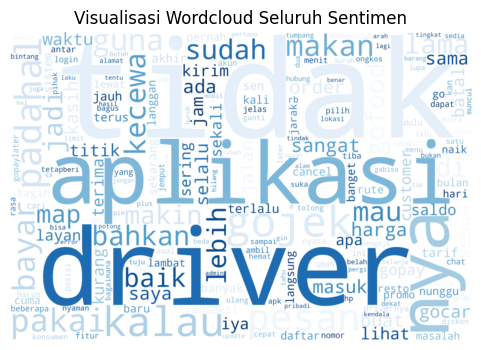

In [30]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(6,4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Visualisasi Wordcloud Seluruh Sentimen')
    plt.show()

all_words = ' '.join([comments for comments in data['content']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='white',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)

In [31]:
data_positif = data[data['sentiment'] == 'Positif']
data_negatif = data[data['sentiment'] == 'Negatif']
data_netral = data[data['sentiment'] == 'Netral']

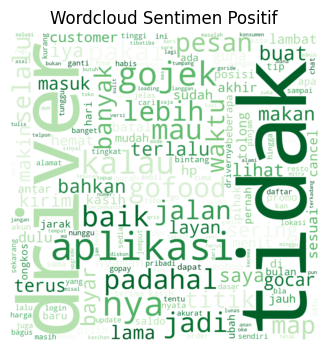

In [32]:
all_words1 = ' '.join([word for word in data_positif["content"]])

wordcloud = WordCloud(
    colormap='Greens',
    width=1000,
    height=1000,
    mode = 'RGBA',
    background_color='white').generate(all_words1)

plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Sentimen Positif')
plt.margins(x=0, y=0)
plt.show()

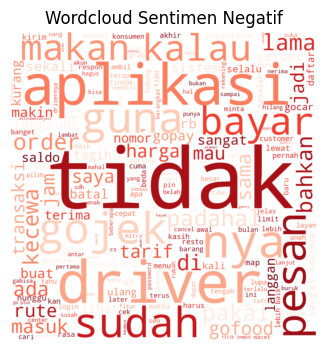

In [33]:
all_words1 = ' '.join([word for word in data_negatif["content"]])

wordcloud = WordCloud(
    colormap='Reds',
    width=1000,
    height=1000,
    mode = 'RGBA',
    background_color='white').generate(all_words1)

plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Sentimen Negatif')
plt.margins(x=0, y=0)
plt.show()

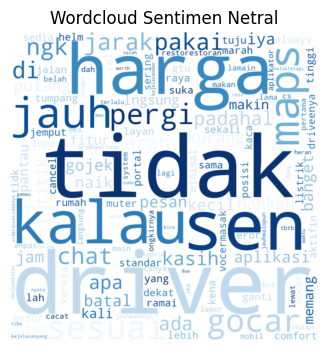

In [34]:
all_words1 = ' '.join([word for word in data_netral["content"]])

wordcloud = WordCloud(
    colormap='Blues',
    width=1000,
    height=1000,
    mode = 'RGBA',
    background_color='white').generate(all_words1)

plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Sentimen Netral')
plt.margins(x=0, y=0)
plt.show()

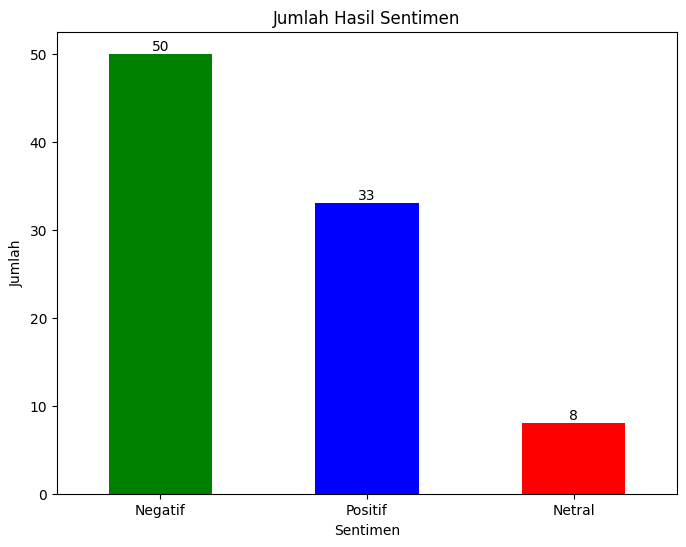

In [35]:
# Hitung jumlah masing-masing sentimen
sentimen_counts = data['sentiment'].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 6))
bars = sentimen_counts.plot(kind='bar', color=['green', 'blue', 'red'])

plt.title('Jumlah Hasil Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)  # Mencegah label sumbu x menjadi terlalu bertumpuk

# Add text annotations
for i, count in enumerate(sentimen_counts):
    plt.text(i, count + 0.05, str(count), ha='center', va='bottom')

plt.show()

# Klasifikasi Model

In [36]:
#konversi label
def convert_label(label):
    if label == 'Positif':
        return 1
    elif label == 'Negatif':
        return -1
    else:
        return 0

data['Label'] = data['sentiment'].apply(convert_label)
data.head()

,content,komentar_english,compound_score,sentiment,Label
0,beberapa bulan kali pesan gocar selalu kecewa ...,A few months the message of Gocar is always di...,-0.7005,Negatif,-1
1,kecewa aplikasi nya mulai error padahal jaring...,Disappointed the application starts with error...,0.2023,Positif,1
2,makin hari makin update tidak jelas tidak liha...,"The more days the update is not clear, I don't...",0.7629,Positif,1
3,aplikasi susah user pertama mau ganti nomor su...,Difficult Application The first user wants to ...,-0.6124,Negatif,-1
4,aplikasi jelek hal transparasi transaksihistor...,Poor application transparency transaction tran...,-0.6597,Negatif,-1


**TF-IDF**

In [37]:
# Menghitung TF-IDF
vectorizer = TfidfVectorizer()
X_sparse = vectorizer.fit_transform(data['komentar_english'])
y = data['Label']

**Training & Testing Model**

c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lenovo\anaconda3\Lib\site-pa

Hasil Evaluasi Model:

Model: Logistic Regression
Akurasi: 0.6071
Classification Report:
              precision    recall  f1-score   support

          -1       0.65      0.94      0.77        18
           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         8

    accuracy                           0.61        28
   macro avg       0.22      0.31      0.26        28
weighted avg       0.42      0.61      0.50        28


Model: Support Vector Machine
Akurasi: 0.6429
Classification Report:
              precision    recall  f1-score   support

          -1       0.64      1.00      0.78        18
           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         8

    accuracy                           0.64        28
   macro avg       0.21      0.33      0.26        28
weighted avg       0.41      0.64      0.50        28


Model: Naive Bayes
Akurasi: 0.6071
Classification Report:
              precis

c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lenovo\anaconda3\Lib\site-pa

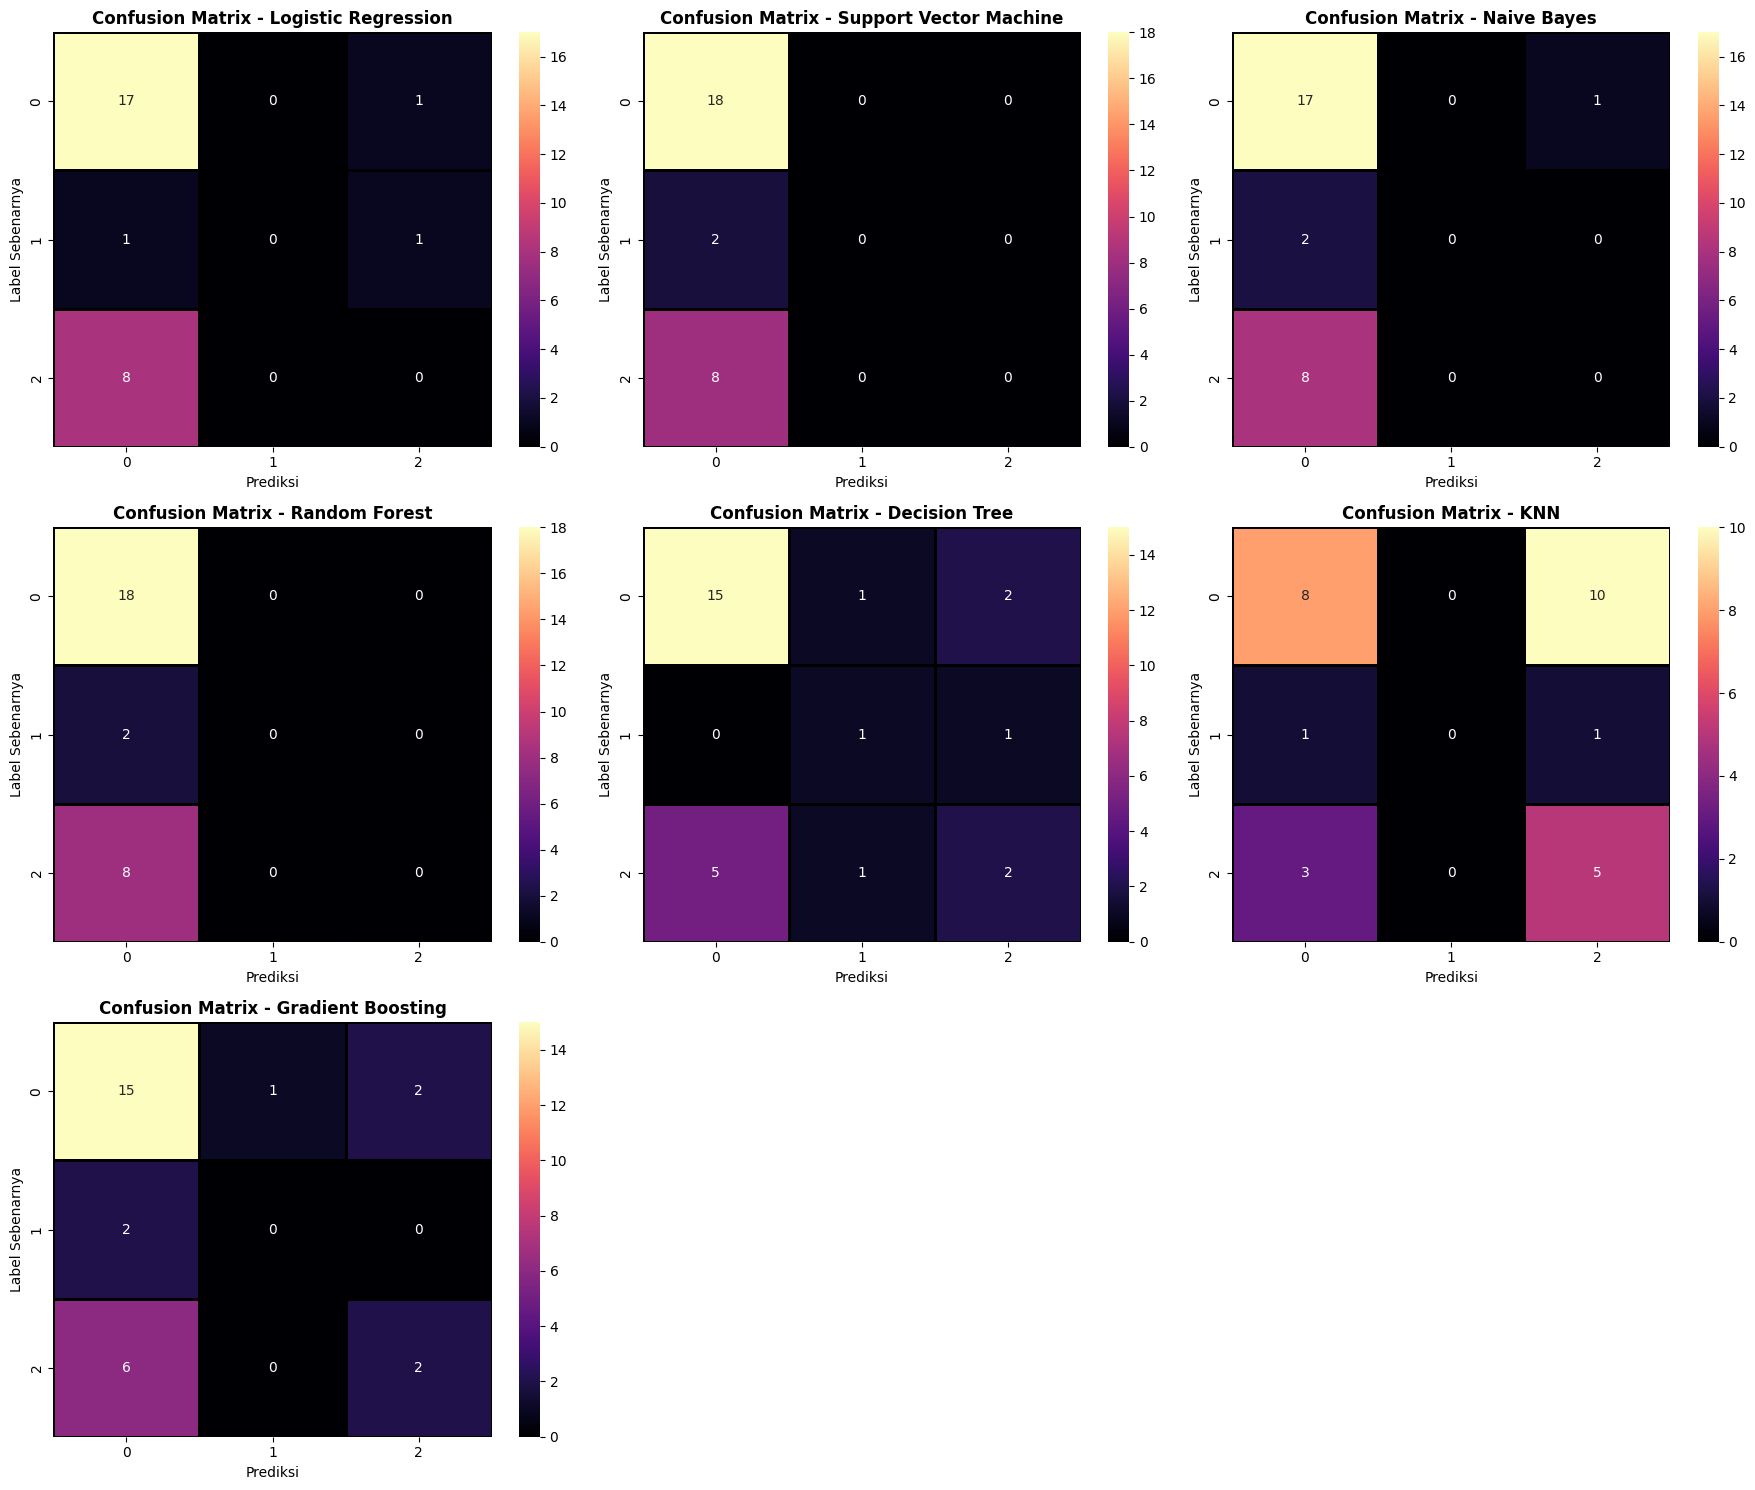

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18700\1427110359.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="rocket")


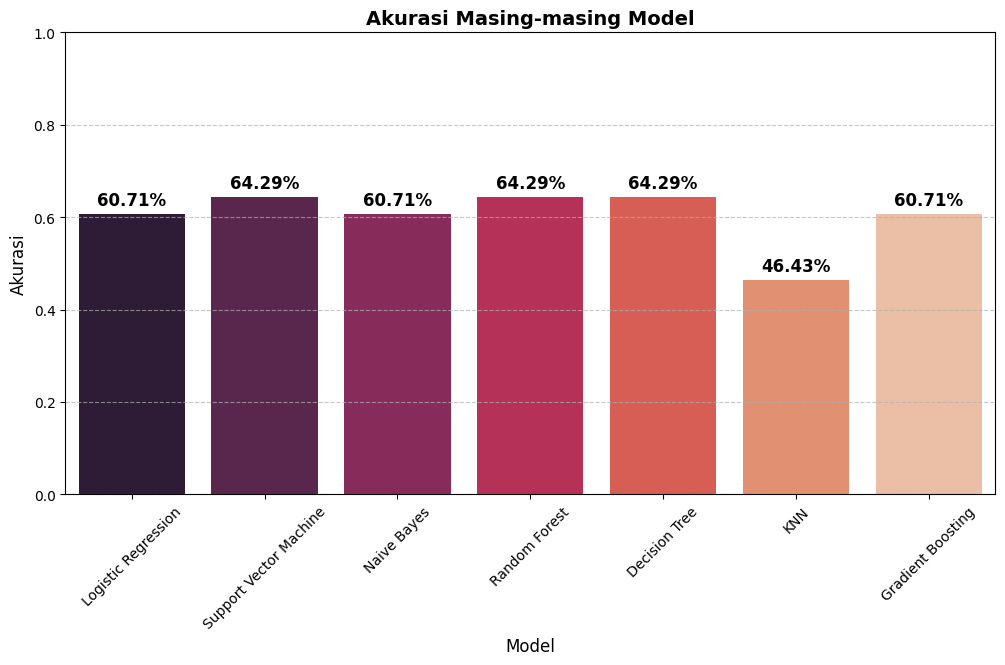

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# -----------------------------
# Pisahkan Data menjadi Training dan Testing (70:30)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X_sparse, y, test_size=0.3, random_state=42)

# -----------------------------
# Definisikan Model-model Klasifikasi
# -----------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# -----------------------------
# Fungsi untuk Melatih dan Mengevaluasi Model
# -----------------------------
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        # Latih model
        model.fit(X_train, y_train)
        # Prediksi data testing
        y_pred = model.predict(X_test)
        # Hitung akurasi
        accuracy = accuracy_score(y_test, y_pred)
        # Dapatkan classification report
        report = classification_report(y_test, y_pred, output_dict=True)
        # Simpan hasil
        results[name] = {
            "accuracy": accuracy,
            "classification_report": report,
            "y_pred": y_pred
        }
    return results

# Evaluasi semua model
results = evaluate_models(models, X_train, X_test, y_train, y_test)

# -----------------------------
# Tampilkan Hasil Evaluasi untuk Setiap Model
# -----------------------------
print("Hasil Evaluasi Model:")
for model_name, result in results.items():
    print(f"\nModel: {model_name}")
    print(f"Akurasi: {result['accuracy']:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, result['y_pred']))

# -----------------------------
# Visualisasikan Confusion Matrix untuk Semua Model
# -----------------------------
n_models = len(models)
n_cols = 3  # Tetapkan jumlah kolom tetap 3
n_rows = int(np.ceil(n_models / n_cols))  # Sesuaikan jumlah baris

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
axes = axes.flatten()

for idx, (model_name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['y_pred'])
    
    # Plot heatmap confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap="magma", linewidths=1, linecolor="black", ax=axes[idx])
    axes[idx].set_title(f"Confusion Matrix - {model_name}", fontsize=12, fontweight="bold")
    axes[idx].set_xlabel("Prediksi", fontsize=10)
    axes[idx].set_ylabel("Label Sebenarnya", fontsize=10)

# Sembunyikan subplot kosong (jika jumlah model tidak pas)
for j in range(idx + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# -----------------------------
# Visualisasikan Akurasi untuk Masing-masing Model
# -----------------------------
model_names = list(results.keys())
accuracies = [results[model]["accuracy"] for model in model_names]

plt.figure(figsize=(12, 6))
sns.barplot(x=model_names, y=accuracies, palette="rocket")

# Menampilkan nilai akurasi di atas setiap bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2%}", ha='center', fontsize=12, fontweight="bold")

plt.title("Akurasi Masing-masing Model", fontsize=14, fontweight="bold")
plt.xlabel("Model", fontsize=12)
plt.ylabel("Akurasi", fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()